dataset: Salesforce/wikitext/wikitext-103-raw-v1

model: pythia

In [1]:
import torch
import datasets
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.modeling_outputs import CausalLMOutputWithPast

from tqdm import tqdm

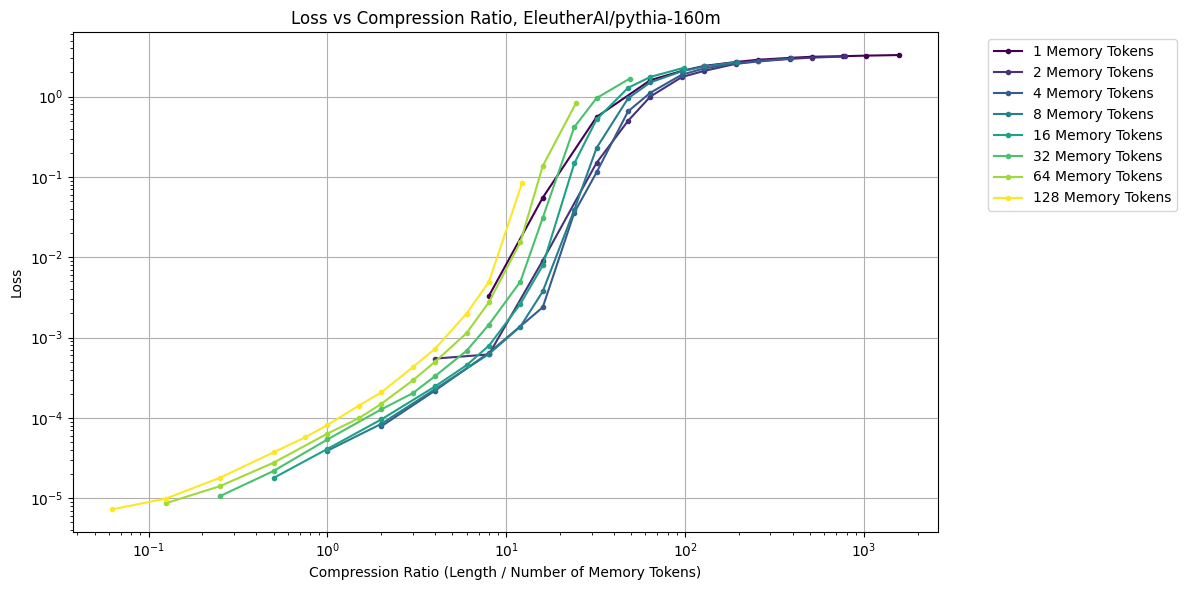

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

max_lengths = [8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1568]
data = {}

for length in max_lengths:
    results = pickle.load(open(f'pythia_160m_results_len_{length}.pkl', 'rb'))
    for n_mem_tokens, samples in results.items():
        avg_best_loss = np.mean([sample['best_loss'] for sample in samples])
        compression_ratio = length / n_mem_tokens
        if n_mem_tokens not in data:
            data[n_mem_tokens] = {'compression_ratios': [], 'losses': []}
        data[n_mem_tokens]['compression_ratios'].append(compression_ratio)
        data[n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap
n_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

for i, (n_mem_tokens, values) in enumerate(sorted(data.items())):
    color = cmap(i / (n_colors - 1))
    ax.plot(values['compression_ratios'], values['losses'], label=f'{n_mem_tokens} Memory Tokens', color=color, marker='.')

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Compression Ratio, EleutherAI/pythia-160m')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(0, 256)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data.keys()), vmax=max(data.keys())))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, label='Number of Memory Tokens', 
#                     ticks=range(min(data.keys()), max(data.keys())+1, 
#                                 max(1, (max(data.keys()) - min(data.keys())) // 5)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

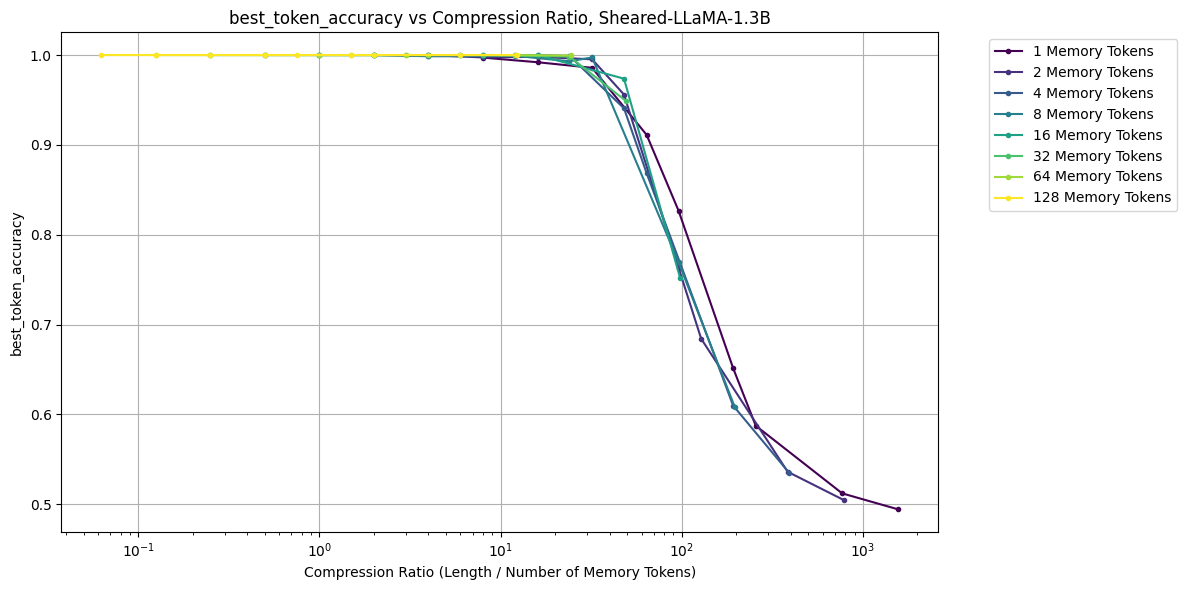

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

max_lengths = [8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1568]
data = {}

metric = 'best_token_accuracy'

for length in max_lengths:
    try:
        results = pickle.load(open(f'Sheared-LLaMA-1.3B_results_len_{length}.pkl', 'rb'))
    except:
        continue
    for n_mem_tokens, samples in results.items():
        avg_best_loss = np.mean([sample[metric] for sample in samples])
        compression_ratio = length / n_mem_tokens
        if n_mem_tokens not in data:
            data[n_mem_tokens] = {'compression_ratios': [], 'losses': []}
        data[n_mem_tokens]['compression_ratios'].append(compression_ratio)
        data[n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap
n_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

for i, (n_mem_tokens, values) in enumerate(sorted(data.items())):
    color = cmap(i / (n_colors - 1))
    ax.plot(values['compression_ratios'], values['losses'], label=f'{n_mem_tokens} Memory Tokens', color=color, marker='.')

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel(metric)
ax.set_title(f'{metric} vs Compression Ratio, Sheared-LLaMA-1.3B')
ax.grid()
ax.set_xscale('log')
# ax.set_yscale('log')
# plt.xlim(0, 256)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data.keys()), vmax=max(data.keys())))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, label='Number of Memory Tokens', 
#                     ticks=range(min(data.keys()), max(data.keys())+1, 
#                                 max(1, (max(data.keys()) - min(data.keys())) // 5)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

skipping EleutherAI/pythia-160m l: 8 mem: 16 c: 0.5
skipping EleutherAI/pythia-160m l: 8 mem: 32 c: 0.2
skipping EleutherAI/pythia-160m l: 8 mem: 64 c: 0.1
skipping EleutherAI/pythia-160m l: 8 mem: 128 c: 0.1
skipping EleutherAI/pythia-160m l: 16 mem: 32 c: 0.5
skipping EleutherAI/pythia-160m l: 16 mem: 64 c: 0.2
skipping EleutherAI/pythia-160m l: 16 mem: 128 c: 0.1
skipping EleutherAI/pythia-160m l: 32 mem: 64 c: 0.5
skipping EleutherAI/pythia-160m l: 32 mem: 128 c: 0.2
skipping EleutherAI/pythia-160m l: 64 mem: 128 c: 0.5
skipping EleutherAI/pythia-160m l: 96 mem: 128 c: 0.8
skipping EleutherAI/pythia-160m l: 768 mem: 1 c: 768.0
skipping EleutherAI/pythia-160m l: 1024 mem: 1 c: 1024.0
skipping EleutherAI/pythia-160m l: 1568 mem: 1 c: 1568.0
skipping EleutherAI/pythia-160m l: 1568 mem: 2 c: 784.0


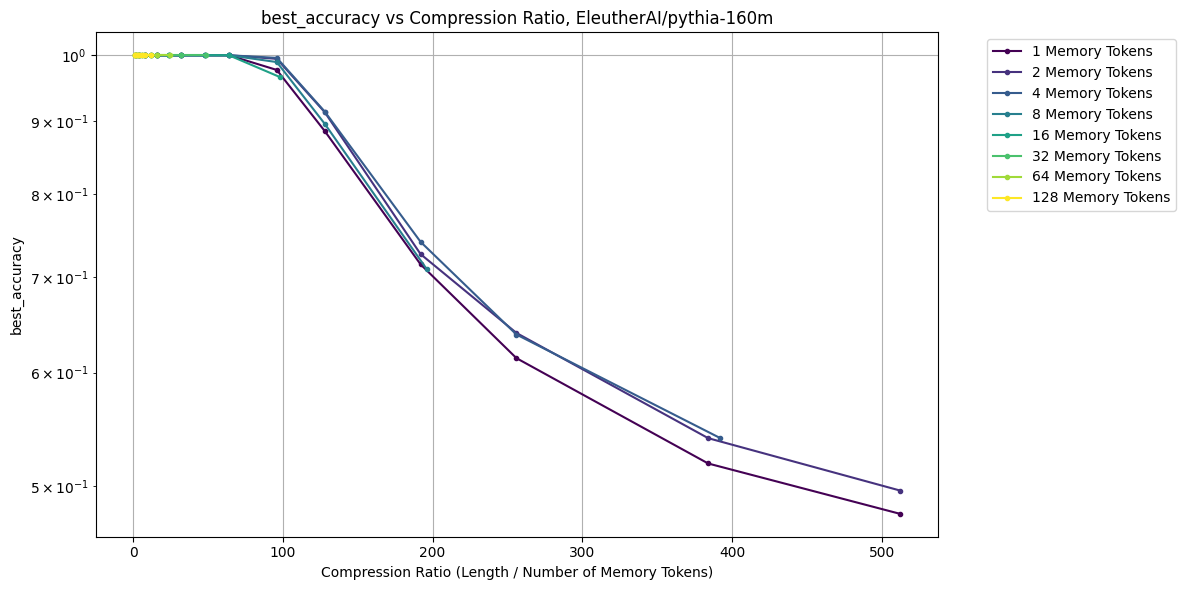

In [5]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

runs_path = Path('../runs')
model_name = 'EleutherAI/pythia-160m'
max_lengths = [8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1568]
n_mem_tokens_list = [1, 2, 4, 8, 16, 32, 64, 128]
data = {}

metric = 'best_accuracy'

for length in max_lengths:
    for n_mem_tokens in n_mem_tokens_list:
        try:
            samples = pickle.load(open(runs_path / model_name/ f'mem_{n_mem_tokens}_len_{length}.pkl', 'rb'))
        except:
            print(f'skipping {model_name} l: {length} mem: {n_mem_tokens} c: {length/n_mem_tokens:.1f}')
            continue
        avg_best_loss = np.mean([sample[metric] for sample in samples])
        compression_ratio = length / n_mem_tokens
        if n_mem_tokens not in data:
            data[n_mem_tokens] = {'compression_ratios': [], 'losses': []}
        data[n_mem_tokens]['compression_ratios'].append(compression_ratio)
        data[n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap
n_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

for i, (n_mem_tokens, values) in enumerate(sorted(data.items())):
    color = cmap(i / (n_colors - 1))
    ax.plot(values['compression_ratios'], values['losses'], label=f'{n_mem_tokens} Memory Tokens', color=color, marker='.')

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel(metric)
ax.set_title(f'{metric} vs Compression Ratio, {model_name}')
ax.grid()
# ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(0, 256)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data.keys()), vmax=max(data.keys())))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, label='Number of Memory Tokens', 
#                     ticks=range(min(data.keys()), max(data.keys())+1, 
#                                 max(1, (max(data.keys()) - min(data.keys())) // 5)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 1 c: 8.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 2 c: 4.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 4 c: 2.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 8 c: 1.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 16 c: 0.5
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 32 c: 0.2
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 64 c: 0.1
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 8 mem: 128 c: 0.1
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 1 c: 16.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 2 c: 8.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 4 c: 4.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 8 c: 2.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 16 c: 1.0
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 32 c: 0.5
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 64 c: 0.2
skipping princeton-nlp/Sheared-LLaMA-1.3B l: 16 mem: 128 c: 0.1
skipp

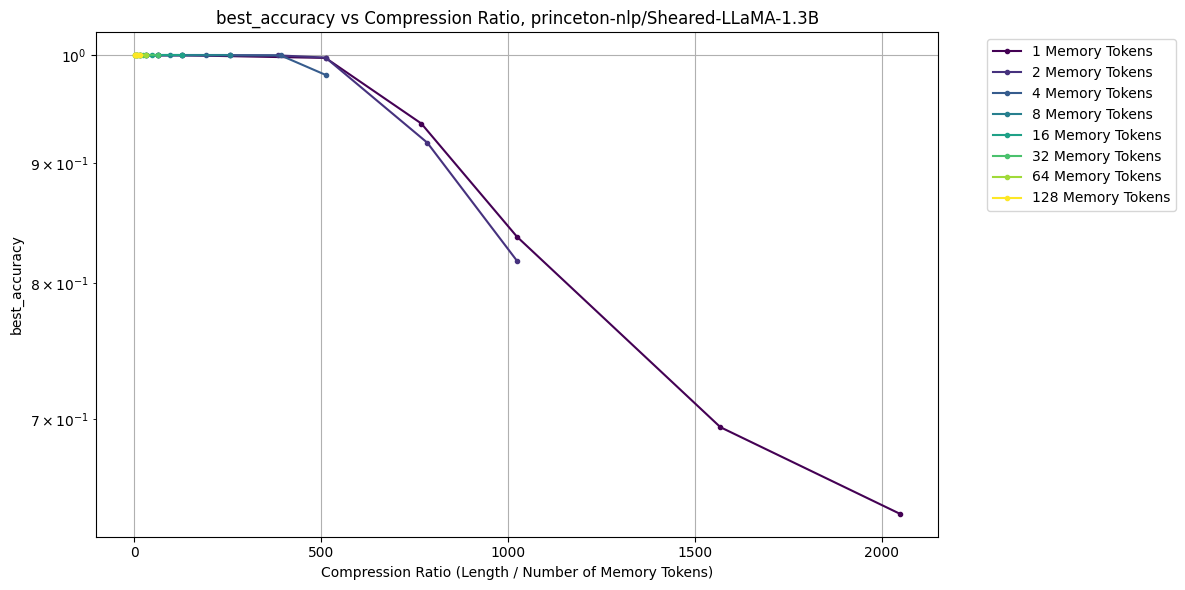

In [9]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

runs_path = Path('../runs')
model_name = 'princeton-nlp/Sheared-LLaMA-1.3B'
max_lengths = [8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1280, 1568, 2048]
n_mem_tokens_list = [1, 2, 4, 8, 16, 32, 64, 128]
data = {}

metric = 'best_accuracy'

for length in max_lengths:
    for n_mem_tokens in n_mem_tokens_list:
        try:
            samples = pickle.load(open(runs_path / model_name/ f'mem_{n_mem_tokens}_len_{length}.pkl', 'rb'))
        except:
            print(f'skipping {model_name} l: {length} mem: {n_mem_tokens} c: {length/n_mem_tokens:.1f}')
            continue
        avg_best_loss = np.mean([sample[metric] for sample in samples])
        compression_ratio = length / n_mem_tokens
        if n_mem_tokens not in data:
            data[n_mem_tokens] = {'compression_ratios': [], 'losses': []}
        data[n_mem_tokens]['compression_ratios'].append(compression_ratio)
        data[n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap
n_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

for i, (n_mem_tokens, values) in enumerate(sorted(data.items())):
    color = cmap(i / (n_colors - 1))
    ax.plot(values['compression_ratios'], values['losses'], label=f'{n_mem_tokens} Memory Tokens', color=color, marker='.')

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel(metric)
ax.set_title(f'{metric} vs Compression Ratio, {model_name}')
ax.grid()
# ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(0, 256)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data.keys()), vmax=max(data.keys())))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, label='Number of Memory Tokens', 
#                     ticks=range(min(data.keys()), max(data.keys())+1, 
#                                 max(1, (max(data.keys()) - min(data.keys())) // 5)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

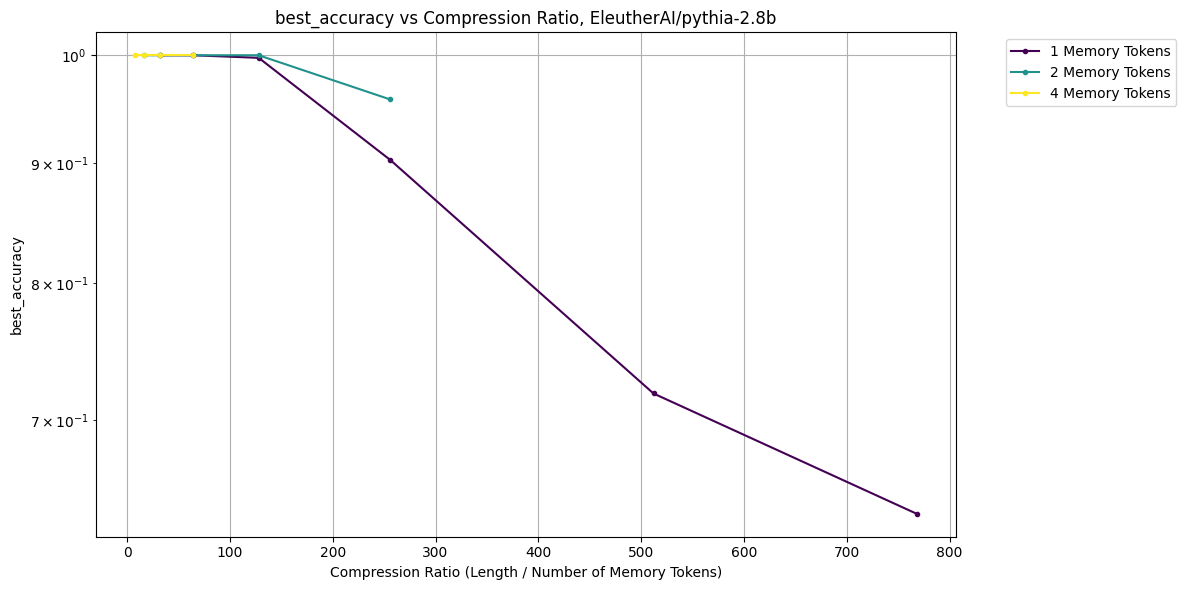

In [8]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

runs_path = Path('../runs')
model_name = 'EleutherAI/pythia-2.8b'
# max_lengths = [8, 16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1280, 1568, 2048]
# n_mem_tokens_list = [1, 2, 4, 8, 16, 32, 64, 128]
data = {}

metric = 'best_accuracy'

# Read all results from the folder
for file_path in (runs_path / model_name).glob('mem_*_len_*.pkl'):
    file_name = file_path.stem
    n_mem_tokens = int(file_name.split('_')[1])
    length = int(file_name.split('_')[3])
    try:
        samples = pickle.load(open(file_path, 'rb'))
    except:
        continue
    
    avg_best_loss = np.mean([sample[metric] for sample in samples])
    compression_ratio = length / n_mem_tokens
    
    if n_mem_tokens not in data:
        data[n_mem_tokens] = {'compression_ratios': [], 'losses': []}
    data[n_mem_tokens]['compression_ratios'].append(compression_ratio)
    data[n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap
n_colors = len(data)
colors = plt.cm.viridis(np.linspace(0, 1, n_colors))
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

for i, (n_mem_tokens, values) in enumerate(sorted(data.items())):
    color = cmap(i / (n_colors - 1))
    # Sort the data points by compression ratio
    sorted_indices = np.argsort(values['compression_ratios'])
    sorted_compression_ratios = np.array(values['compression_ratios'])[sorted_indices]
    sorted_losses = np.array(values['losses'])[sorted_indices]
    ax.plot(sorted_compression_ratios, sorted_losses, label=f'{n_mem_tokens} Memory Tokens', color=color, marker='.')

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel(metric)
ax.set_title(f'{metric} vs Compression Ratio, {model_name}')
ax.grid()
# ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(0, 256)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data.keys()), vmax=max(data.keys())))
sm.set_array([])  # This line is necessary for the colorbar to work correctly

# Add colorbar
# cbar = fig.colorbar(sm, ax=ax, label='Number of Memory Tokens', 
#                     ticks=range(min(data.keys()), max(data.keys())+1, 
#                                 max(1, (max(data.keys()) - min(data.keys())) // 5)))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

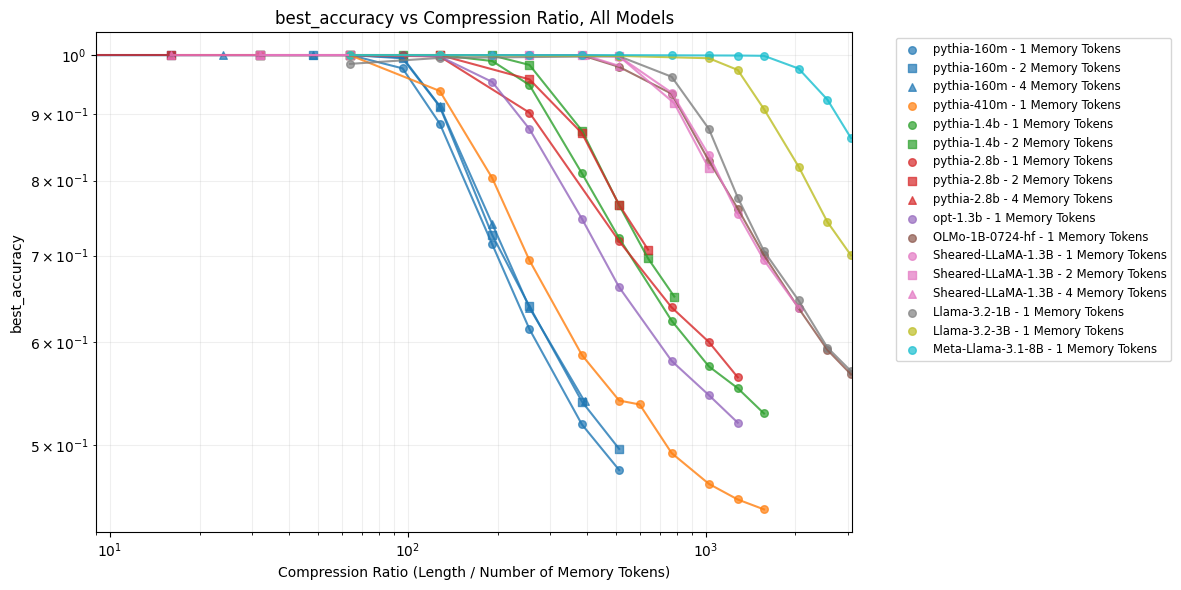

In [3]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

runs_path = Path('../runs')
model_names = ['EleutherAI/pythia-160m', 'EleutherAI/pythia-410m', 'EleutherAI/pythia-1.4b',
               'EleutherAI/pythia-2.8b', #'EleutherAI/pythia-6.9b',
               'facebook/opt-1.3b', 'allenai/OLMo-1B-0724-hf',
               'princeton-nlp/Sheared-LLaMA-1.3B',
               'meta-llama/Llama-3.2-1B', 'meta-llama/Llama-3.2-3B', 'meta-llama/Meta-Llama-3.1-8B',]
data = {}

n_mem_tokens_list = [1, 2, 4]#, 16, 32, 64, 128]

metric = 'best_accuracy'

# Read all results for each model
for model_name in model_names:
    data[model_name] = {}
    for file_path in (runs_path / model_name).glob('mem_*_len_*.pkl'):
        file_name = file_path.stem
        if 'rnd' in file_name:
            continue
        n_mem_tokens = int(file_name.split('_')[1])
        length = int(file_name.split('_')[3])
        if n_mem_tokens not in n_mem_tokens_list:
            continue
        try:
            samples = pickle.load(open(file_path, 'rb'))
        except:
            continue
        
        avg_best_loss = np.mean([sample[metric] for sample in samples])
        compression_ratio = length / n_mem_tokens
        
        if n_mem_tokens not in data[model_name]:
            data[model_name][n_mem_tokens] = {'compression_ratios': [], 'losses': []}
        data[model_name][n_mem_tokens]['compression_ratios'].append(compression_ratio)
        data[model_name][n_mem_tokens]['losses'].append(avg_best_loss)

fig, ax = plt.subplots(figsize=(12, 6))

# Create a custom colormap for models
n_models = len(model_names)

import colorcet as cc


model_colors = plt.cm.tab10(np.linspace(0, 1, n_models))
# model_colors = cc.rainbow(np.linspace(0, 1, n_models))
# cc.b_rainbow_bgyr_10_90_c83

# Create a list of markers for different n_mem_tokens
markers = ['o', 's', '^', 'D']

for model_idx, model_name in enumerate(model_names):
    model_data = data[model_name]
    if not model_data:  # Skip if no data for this model
        continue
    
    model_color = model_colors[model_idx]
    
    for i, n_mem_tokens in enumerate(n_mem_tokens_list):
        if n_mem_tokens in model_data:
            values = model_data[n_mem_tokens]
            marker = markers[i % len(markers)]
            
            sorted_indices = np.argsort(values['compression_ratios'])
            sorted_compression = np.array(values['compression_ratios'])[sorted_indices]
            sorted_metrics = np.array(values['losses'])[sorted_indices]

            ax.scatter(sorted_compression, sorted_metrics, 
                       label=f'{model_name.split("/")[-1]} - {n_mem_tokens} Memory Tokens', 
                       color=model_color, marker=marker, s=30, alpha=0.7)
            ax.plot(sorted_compression, sorted_metrics, color=model_color, alpha=0.8)

ax.set_xlabel('Compression Ratio (Length / Number of Memory Tokens)')
ax.set_ylabel(metric)
ax.set_title(f'{metric} vs Compression Ratio, All Models')
ax.grid(True, which="both", ls="-", alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(9, 3100)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()